# Seasonal Effects on Female Red-Billed Gull Size in New Zealand.
**Prepared by Group 4: Arnab Das, Maggie Wang, Paul Zeng, Dylan Zhang**

## Introduction
The red-billed gull is the most common gull on the New Zealand coast. It is frequently seen in coastal towns, garbage dumps, and at fish processing facilities (Red-billed gull: Tarāpunga, n.d.). We would like to find the differences in means of the weights and lengths of the female red-billed gull based on the two season climates. The question we will be investigating is: Are there significant differences in the mean weights and mean lengths of female red-billed gulls between the winter and summer seasons in New Zealand? We believe that the primary and underlying cause of the size variations within a year for the red-billed gulls lies in the seasonal effects that bring about change in various aspects of their habits.

Some seasonal effects include:
- An extremely long egg-laying period that can extend from mid-September to January.
- The main food at the largest colonies is the euphausiid Nyctiphanes australis (krill) which occurs more abundantly within the spring season and early summer (Mills et al., 2008).
- The relative abundance of krill has been correlated positively with the Southern Oscillation Index (SOI) (Mills et al., 2008). The SOI is calculated using the differences in pressure between Tahiti and Darwin, which typically peaks during southern hemisphere spring (September - December) (Pacific Marine Environmental Laboratory, n.d.).
- At Kaikoura during the breeding season adult gulls can sustain themselves on alternative foods such as earthworms, small fish, garbage and kelp flies, but they are dependent upon an abundant and regular supply of the surface-swarming krill for successful breeding. Outside of the breeding season the diet is highly variable. Some still feed at sea; others feed on small invertebrates along the shore, or from human sources such as handouts in towns or cities, offal being discarded from fishing boats and garbage at rubbish dumps.

In this report, we will use the GULLS.csv dataset from NZGRAPHER (Dataset, n.d.). The dataset contains information on the weight and length of gulls, as well location (Maraetai, Muriwai, or Piha), coast (east or west), season (summer or winter) and sex (male or female) of the gull.


Our hypothesis tests are as follows:
- Null hypothesis ($H_0$): <br>
> $H_0: \mu_1 - \mu_2 = 0$.

- Alternative hypothesis ($H_a$): <br>
> $H_1: \mu_1 - \mu_2 \neq 0$.

where $\mu_1$ = The weight of the gulls during the summer, $\mu_2$ = the weight of the gulls during the winter.

and:
- Null hypothesis ($H_0$): <br>
> $H_0: \mu_3 - \mu_4 = 0$.

- Alternative hypothesis ($H_a$): <br>
> $H_1: \mu_3 - \mu_4 \neq 0$.

where $\mu_3$ = The length of the gulls during the summer, $\mu_4$ = the length of the gulls during the winter.

## Methods and Results
We first loaded all libraries pertaining and relevant for this data analysis.

In [1]:
# Loading all the required libraries
library(infer)
library(tidyverse)
library(broom)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Since the data was stored elsewhere, we used `read_csv` to import from the website and loaded the data onto our worksheet. We used `as_factor` to convert the variables of location, coast, season, and sex from characters to factors, to make it easier to perform statistical operations on them.

In [2]:
# Reading dataframe from the internet and storing it to a variable
gulls <- read_csv("https://raw.githubusercontent.com/maggie63/stat-201-group-4/main/gulls_data.csv") |>
    mutate(LOCATION = as_factor(LOCATION), COAST = as_factor(COAST), SEASON = as_factor(SEASON), SEX = as_factor(SEX)) |>
    filter((!is.na(WEIGHT)))

# Printing the first few rows of the dataframe
head(gulls)

Rows: 2487 Columns: 6

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (4): LOCATION, COAST, SEASON, SEX
dbl (2): WEIGHT, LENGTH


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



WEIGHT,LENGTH,LOCATION,COAST,SEASON,SEX
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
262,38.9,MARAETAI,EAST,WINTER,MALE
300,41.3,MURIWAI,WEST,SUMMER,MALE
250,36.6,MURIWAI,WEST,WINTER,MALE
242,36.0,MARAETAI,EAST,WINTER,FEMALE
261,37.1,MURIWAI,WEST,WINTER,MALE
262,38.2,MURIWAI,WEST,WINTER,MALE


*Table 1.0: First few rows of "Gulls Data Set" with 2487 rows and 6 columns*


We then checked whether the seasons are represented similarly/equally and the number of samples is more than 30 per season.

In [3]:
# Group data to see if the categorical variables are representated properly
n_obs <- gulls |>
    select(-LENGTH) |>
    filter(SEX == "FEMALE" ) |>
    group_by(SEASON) |>
    summarise(n = n())
n_obs

SEASON,n
<fct>,<int>
WINTER,615
SUMMER,665


*Table 2.0: Number of observations recorded during each season.*

Since the population is representated properly in the sample, we were able to move on with the rest of the analysis.

We began by filtering the data to select only female gulls, and to get rid of any rows that may have been missing data. We created two different data frames, one for weight and one for length.

In [4]:
# Filtering and grouping weight data
gull_weights <- gulls |> 
    filter(SEX == "FEMALE" & (!is.na(WEIGHT))) |>
    select(WEIGHT, SEASON)
head(gull_weights)

WEIGHT,SEASON
<dbl>,<fct>
242,WINTER
278,SUMMER
278,SUMMER
247,WINTER
268,SUMMER
274,SUMMER


*Table 3.1: Filtered data frame containing weight of gulls and season.*

In [5]:
# Filtering and grouping length data
gull_lengths <- gulls |> 
    filter(SEX == "FEMALE" & (!is.na(LENGTH))) |>
    select(LENGTH, SEASON)
head(gull_lengths)

LENGTH,SEASON
<dbl>,<fct>
36.0,WINTER
35.2,SUMMER
37.4,SUMMER
36.9,WINTER
36.6,SUMMER
35.4,SUMMER


*Table 3.2: Filtered data frame containing length of gulls and season.*

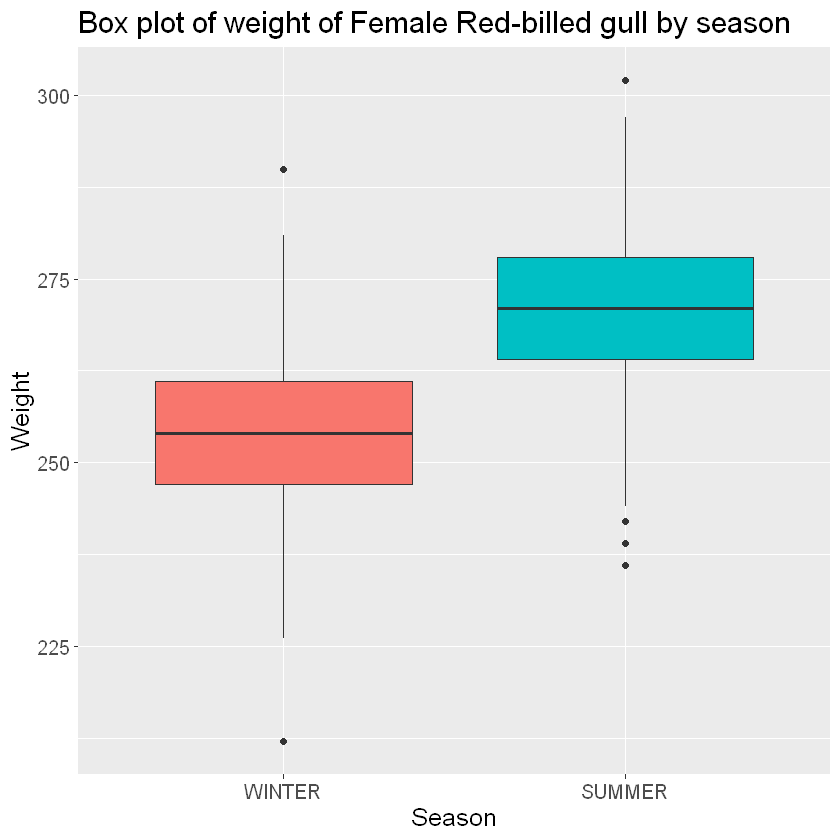

In [6]:
winter_summer_weight_boxplots <-
    gull_weights |>
    ggplot() +
    geom_boxplot(aes(x = SEASON, y = WEIGHT, fill = SEASON)) +
    ggtitle("Box plot of weight of Female Red-billed gull by season") +
    xlab("Season") +
    ylab("Weight") +
    guides(fill = "none") +
    theme(text = element_text(size = 15))
winter_summer_weight_boxplots

*Figure 1.1: Boxplot comparing weight of gulls in winter vs. summer.*

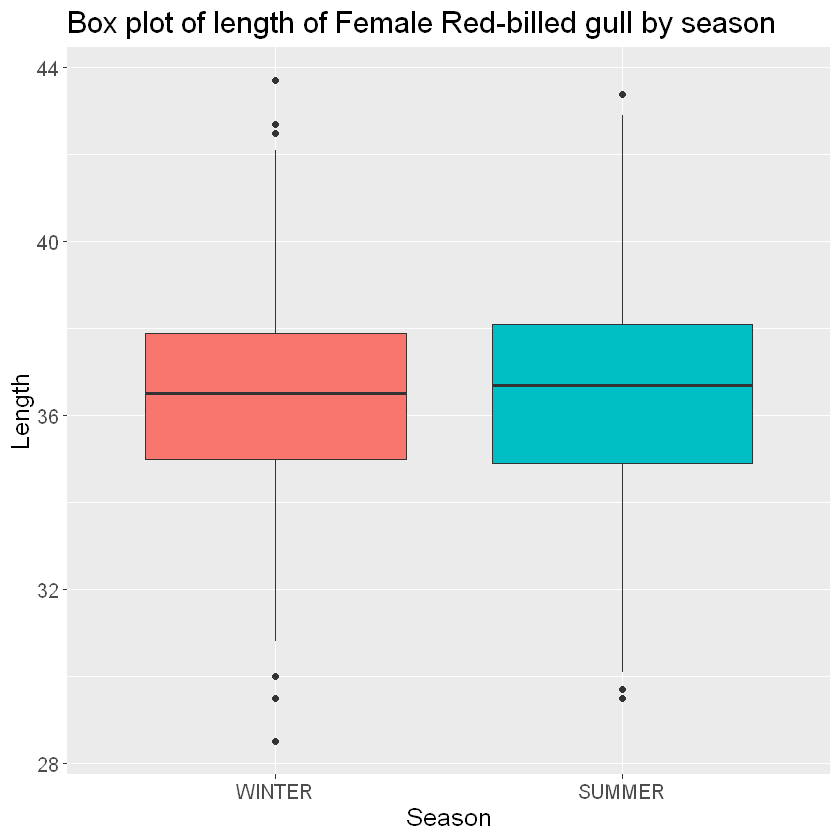

In [7]:
winter_summer_length_boxplots <-
    gull_lengths |>
    ggplot() +
    geom_boxplot(aes(x = SEASON, y = LENGTH, fill = SEASON)) +
    ggtitle("Box plot of length of Female Red-billed gull by season") +
    xlab("Season") +
    ylab("Length") +
    guides(fill = "none") +
    theme(text = element_text(size = 15))
winter_summer_length_boxplots

*Figure 1.2: Boxplot comparing length of gulls in winter vs. summer.*

The median weight is around 250 cm in the winter while in the summer it is around 270 cm. There is a similar spread in gull weights across seasons. Both seasons have similar ranges and interquartile ranges of weight (IQR), and there are similar numbers of outliers. Overall, the gull weight distributions have a similar spread, but different centers, depending on the season.

Across both seasons, the median length is around 35 cm and the spread is similar. For both seasons, the range and interquartile range of length (IQR) show a similar pattern, and the number of outliers is similar. Overall, the distribution of gull lengths between the two seasons is similar, with identical spreads and centers.

Next, we drew a single random sample of size 50, making sure to set the seed first so that our results for randomization are reproducible. We then calculated the sample mean and sample standard error for both the weight and length, and stored them in separate data frames, along with the number of observations from each season.

In [8]:
# Setting the seed
set.seed(1)

# Drawing a sample of size 50
gull_weight_sample <- gull_weights |> sample_n(size = 50)
gull_length_sample <- gull_lengths |> sample_n(size = 50)

# Computing estimates
gull_weight_summary <- gull_weight_sample |>
    group_by(SEASON) |>
    summarise(n = n(),
              sample_mean = mean(WEIGHT), 
              sample_std_error = sd(WEIGHT) / sqrt(n))

gull_length_summary <- gull_length_sample |>
    group_by(SEASON) |>
    summarise(n = n(),
              sample_mean = mean(LENGTH), 
              sample_std_error = sd(LENGTH) / sqrt(n))

gull_weight_summary
gull_length_summary

SEASON,n,sample_mean,sample_std_error
<fct>,<int>,<dbl>,<dbl>
WINTER,27,253.2222,1.860776
SUMMER,23,268.5217,2.331151


SEASON,n,sample_mean,sample_std_error
<fct>,<int>,<dbl>,<dbl>
WINTER,19,35.92632,0.5650566
SUMMER,31,35.42581,0.3314669


*Table 4.1 (top) and 4.2 (bottom): Summary of weight (top) and length (bottom) samples, grouped by season. Contains number of observations (n), sample mean, and sample standard error.*

### Hypothesis Testing

### Using classical tests based on t distributions:

We performed hypothesis testing using the `t.test()` function from the`infer` package.

In [9]:
# infer tests for weight, testing winter vs summer seasons of the red billed gulls
weight_test <- tidy(
    t.test(
        x = gull_weight_sample |>
            filter(SEASON == "SUMMER") |>
            pull(WEIGHT),
        y = gull_weight_sample |>
            filter(SEASON == "WINTER") |>
            pull(WEIGHT),
        stat = "diff in means",
        alternative = "two.sided",
        conf.level = 0.90
        )
    )
weight_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
15.29952,268.5217,253.2222,5.129345,6.318476e-06,43.88963,10.28755,20.31148,Welch Two Sample t-test,two.sided


*Table 5.1: T-test results for gull weight.*

In [10]:
# infer tests for length, testing winter vs summer seasons of the red billed gulls
length_test <- tidy(
    t.test(
        x = gull_length_sample |>
            filter(SEASON == "SUMMER") |>
            pull(LENGTH),
        y = gull_length_sample |>
            filter(SEASON == "WINTER") |>
            pull(LENGTH),
        stat = "diff in means",
        alternative = "two.sided",
        conf.level = 0.90
        )
    )
length_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.5005093,35.42581,35.92632,-0.7640168,0.4507541,30.3622,-1.611967,0.6109482,Welch Two Sample t-test,two.sided


*Table 5.2: T-test results for gull length.*

For our analysis, we conducted hypothesis tests to compare the mean weights and mean lengths of female red-billed gulls between the winter and summer seasons. We used the Welch Two Sample t-test, which is suitable for comparing means when the assumption of equal variances is not met. This choice aligns with the inherent variability of biological measurements, where unequal variances can be expected.

#### Weight Hypothesis Test:
We first conducted a hypothesis test for mean weights. The calculated test statistic was 5.129, resulting in a p-value of 6.318476e-06. With a significance level of 0.05, the p-value is significantly lower. Therefore, we reject the null hypothesis, suggesting that there are statistically significant differences in mean weights between winter and summer seasons. The 90% confidence interval for the difference in means is [10.28755, 20.31148].

#### Length Hypothesis Test:
Next, we performed a similar hypothesis test for mean lengths. The computed test statistic was -0.764, yielding a p-value of 0.4507541. As the p-value exceeds 0.05, we do not have enough evidence to reject the null hypothesis. This implies that there are no statistically significant differences in mean lengths between winter and summer seasons. The 90% confidence interval for the difference in means is [-1.611967, 0.6109482].

### Confidence interval using bootstrap distribution:

First, we found the bootstrap distribution for the difference in medians with the `infer` package. Using `gull_weight_sample`, we specified the response and explanatory variables, generated 1000 samples, and calculated mean weight in summer minus the mean weight in winter. We repeated the process for the difference in mean length in summer minus winter.

In [11]:
set.seed(9263)

diff_in_mean_weights_bootstrap_dist <- gull_weight_sample |>
   specify(formula = WEIGHT ~ SEASON) %>% 
   generate(reps = 1000, type = "bootstrap") %>% 
   calculate(stat = "diff in means", order = c("SUMMER", "WINTER"))

head(diff_in_mean_weights_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,16.66234
2,14.90640
3,14.45894
4,10.23377
5,18.52000
6,18.50649


*Table 6.1: Data frame containing bootstrap distribution for the difference in mean gull weights (summer minus winter).*

In [12]:
set.seed(9263)

diff_in_mean_lengths_bootstrap_dist <- gull_length_sample |>
   specify(formula = LENGTH ~ SEASON) %>% 
   generate(reps = 1000, type = "bootstrap") %>% 
   calculate(stat = "diff in means", order = c("SUMMER", "WINTER"))

head(diff_in_mean_lengths_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,0.1089744
2,-0.6508021
3,0.3408730
4,-1.7147950
5,-0.5537842
6,-0.8320000


*Table 6.2: Data frame containing bootstrap distribution for the difference in mean gull lengths (summer minus winter).*

We used the bootstrap distributions for difference in mean weights and lengths to find the 90% confidence interval.

In [13]:
diff_in_mean_weights_ci <- diff_in_mean_weights_bootstrap_dist |> get_ci(level = 0.9, type = "percentile")
diff_in_mean_weights_ci

lower_ci,upper_ci
<dbl>,<dbl>
10.34968,20.21379


*Table 7.1: Data frame containing lower and upper bounds of 90% confidence interval for the difference in mean weights bootstrap distribution.*

In [14]:
diff_in_mean_lengths_ci <- diff_in_mean_lengths_bootstrap_dist |> get_ci(level = 0.9, type = "percentile")
diff_in_mean_lengths_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1.524702,0.5887879


*Table 7.2: Data frame containing lower and upper bounds of 90% confidence interval for the difference in mean lengths bootstrap distribution.*

Our next step was to visualize our confidence intervals for both variables with their bootstrap distributions. We also added a vertical line representing their respective test statistics, which was found from our hypothesis tests earlier.

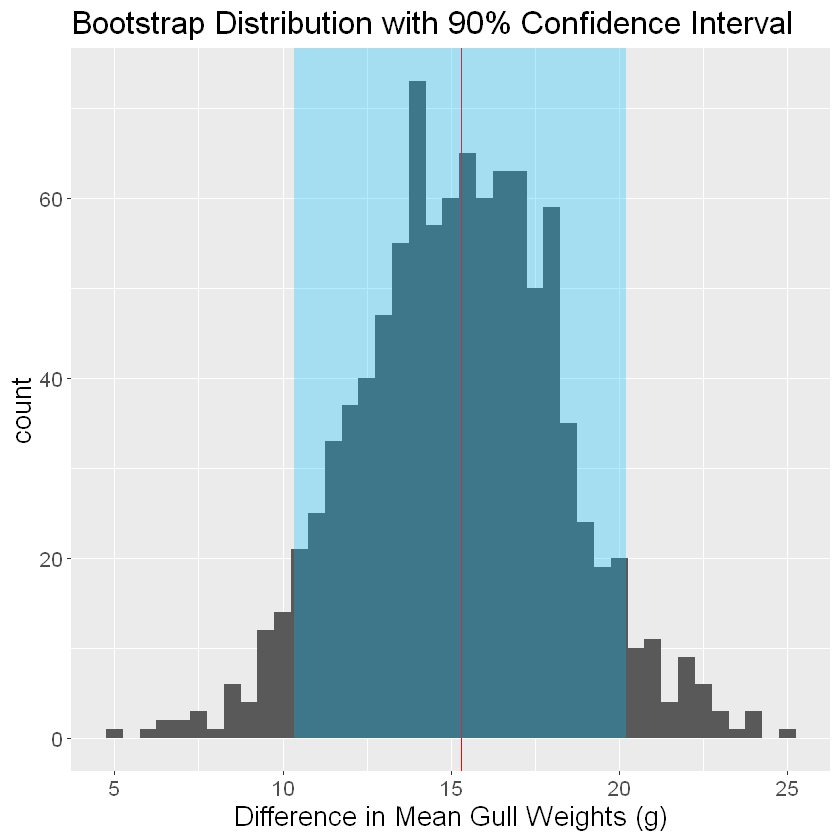

In [15]:
diff_in_mean_weights_ci_plot <- diff_in_mean_weights_bootstrap_dist |>
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 0.5) +
    geom_vline(xintercept = weight_test$estimate[1], colour = "red") +
    annotate("rect", xmin = diff_in_mean_weights_ci$lower_ci, xmax = diff_in_mean_weights_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    labs(title = "Bootstrap Distribution with 90% Confidence Interval",
         x = "Difference in Mean Gull Weights (g)") +
    theme(text = element_text(size=16))

diff_in_mean_weights_ci_plot

*Figure 2.1: Bootstrap distribution for difference in mean gull weights. 90% confidence interval is highlighted in blue, and test statistic marked with a red line.*

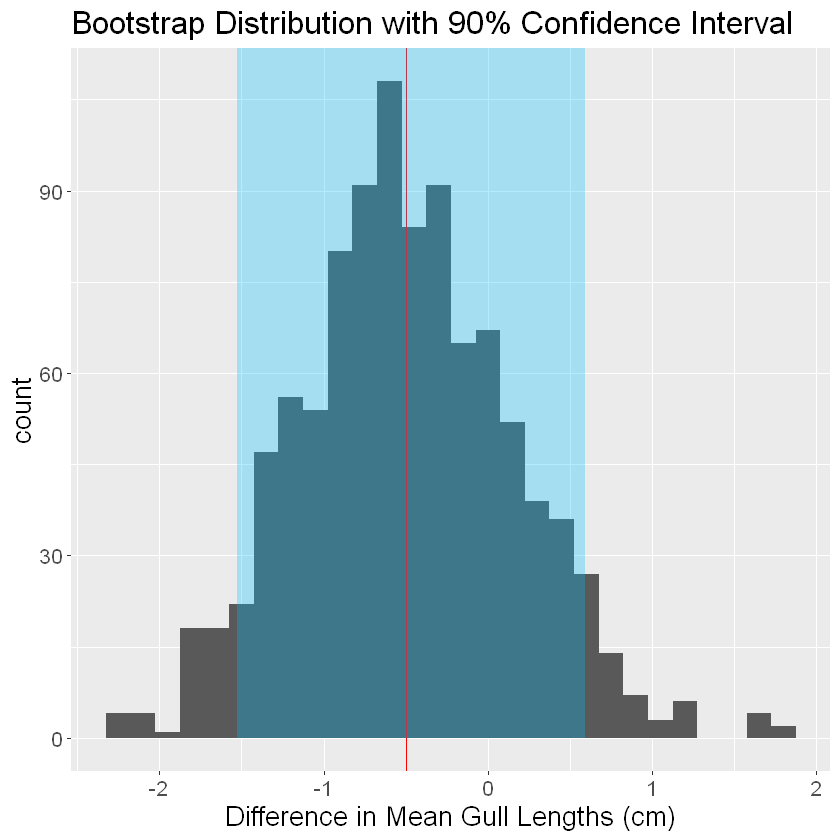

In [16]:
diff_in_means_ci_plot <- diff_in_mean_lengths_bootstrap_dist |>
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 0.15) +
    geom_vline(xintercept = length_test$estimate[1], colour = "red") +
    annotate("rect", xmin = diff_in_mean_lengths_ci$lower_ci, xmax = diff_in_mean_lengths_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    labs(title = "Bootstrap Distribution with 90% Confidence Interval",
         x = "Difference in Mean Gull Lengths (cm)") +
    theme(text = element_text(size=16))
diff_in_means_ci_plot

*Figure 2.2: Bootstrap distribution for difference in mean gull lengths. 90% confidence interval is highlighted in blue, and test statistic marked with a red line.*

#### Boostrapping vs Asymptotics:
In this analysis, both bootstrapping and asymptotics could be considered appropriate methods. Bootstrapping is a resampling technique that can provide robust results, particularly when the sample size is relatively small, and when the underlying assumptions of parametric tests might be violated. Asymptotics, on the other hand, rely on large-sample theory and may be appropriate when the sample size is sufficiently large and data are approximately normally distributed. 


The results from both methods are generally consistent in our analysis, showing differences in mean weights to be statistically significant and differences in mean lengths to be non-significant. While both methods yield similar conclusions, bootstrapping might offer a more reliable approach when the assumptions of normality are not met. However, given that our sample size is reasonable and the Welch t-test is robust against violations of normality, asymptotics are also suitable. Although the results are similar, the small differences between them is due to the different assumptions and methods used in each approach as mentioned above. 


Ultimately, our findings provide consistent evidence that there are statistically significant differences in mean weights between winter and summer seasons for female red-billed gulls. In contrast, mean lengths do not exhibit significant differences between the two seasons.

## Discussion
#### Summary of Findings
From our analysis of female red-billed gulls in New Zealand, we observed the following:

Weight Differences: There are statistically significant differences in mean weights between winter and summer seasons. The mean weight of female gulls during the summer (268.52 grams) is significantly higher than that during the winter (253.22 grams).

Length Differences: However, the mean lengths of female gulls did not exhibit statistically significant differences between the two seasons. The mean length during the summer (35.43 cm) and winter (35.93 cm) remained relatively consistent.
#### Implications/Imact
These findings carry important implications for understanding the seasonal dynamics of female red-billed gulls:

Feeding and Breeding Patterns: The significant weight difference suggests that gulls might experience varied feeding and breeding behaviors during different seasons. The higher weight during summer could be attributed to increased access to food resources like krill.

Climate and Environmental Factors: Climate variations, such as temperature and food availability, could impact gull weights differently across seasons. Understanding these factors is crucial for gull population management and conservation efforts.
#### Expected vs Observed Results
Our finding of significant weight differences aligns with our initial expectation. Seasonal variations in food availability, with krill being more abundant during the summer, likely contribute to the observed weight differences. However, the lack of significant differences in mean lengths was unexpected, indicating that gulls might not experience substantial physical growth variations between seasons.
#### Future Implications
This study opens up avenues for further investigations:
<ol>
<li>Feeding Ecology: Future research could delve into the specific dietary choices and foraging behaviors of gulls during different seasons, shedding light on their preferred food sources and how these impact weight variations.</li>

<li>Climate Change Impact: Considering the implications of climate change on the availability of krill and other food sources, exploring the long-term impact of changing environmental conditions on gull populations could provide valuable insights.</li>

<li>Interplay of Factors: Investigating the interplay of factors beyond seasons, such as location and human activities, can deepen our understanding of the complex dynamics affecting gull weights and lengths.</li>

<li>Population Health: Correlating weight variations with other health indicators, such as reproductive success and survival rates, could provide a comprehensive view of how seasonal differences impact gull populations' overall health and viability.</li>
</ol>

#### Conclusion
In conclusion, our study sheds light on the seasonal weight differences among female red-billed gulls in New Zealand, while highlighting the importance of considering various environmental and ecological factors. The observed patterns provide a foundation for further research and conservation efforts aimed at understanding and protecting these avian populations in the face of changing conditions.

## References
1. Dataset. NZGRAPHER. (n.d.). https://grapher.jake4maths.com/?folder=sneddon&dataset=GULLS.csv
2. GULLS.CSV information. Inference. (n.d.). https://sites.google.com/view/inference/data-sets#h.p_IlT79LKK_MeP
3. Mills, J. A., Yarrall, J. W., Bradford-Grieve, J. M., Uddstrom, M. J., Renwick, J. A., & Merilä, J. (2008). The impact of climate fluctuation on food availability and reproductive performance of the planktivorous red-billed gulllarus novaehollandiae scopulinus. Journal of Animal Ecology, 77(6), 1129–1142. https://doi.org/10.1111/j.1365-2656.2008.01383.x 
4. Pacific Marine Environmental Laboratory. (n.d.). La Niña faqs. El Niñ0 Theme Page. https://www.pmel.noaa.gov/elnino/lanina-faq 
5. Red-billed gull: Tarāpunga: New Zealand Birds Online. New Zealand Birds Online - The digital encyclopaedia of New Zealand birds. (n.d.). https://nzbirdsonline.org.nz/species/red-billed-gull